Done

---
1. Freesurfer + easy_lausanne -> DKT, Desikan, Destriuex, lausanne parcellations.
2. Tractography using ~IC7 scale meshes -> Connectivity matrices (20484 x 20484).
---

TODO

3. **???** For **CUSTOM parcellation** Remove vertices corresponding to Corpus Callosum and Cerebellum (using **group mapping**, to preserve number of vertices across different subjects the same).
4. `Edge thresholding (10% - 20% -...- 100%) to deal with noisy edges.`
5. **Custom parcellation (subject-wise)** For every threholding cluster network nodes:
    - `Louvain` (~~Spectral or Ncut (?) (**too slow**). Latter two might work only for sparse (high thresholding) networks.)~~
6. **Custom parcellation (group-wise)** For all thresholdings for every clustering algorithm (separately) apply 2 approaches to combine clusterings. `Repeat on shuffle split to investigate stability of group-wise parcellation.`
    - `HE (Hard Ensemble)`
    - `Graph based ensemble (construct meta graph, cluster it using louvain)` **CSPA**
        - `build agreement graph`
        - `cluster agreement graph`
    - `Compute average graph, cluster it using louvain. 3 levels` **Average**
    - `Did shuffle split for level3-sparsity10 and for level3-sparsity-100`
7. Apply parcellations to all thresholdings
    - ~~DKT~~
    - `Desikan`
    - `Destriuex `
    - ~~all laussanne's)~~
    - `Individual Louvain parcellation (3 levels)`
    - `Hard ensemble` **HE**
    - `Average network parcellation (3 levels)`
    - `CSPA`
8. Investigate graph properties of all kinds of networks.
9. Compare stability of every subject-wise parcellations (how similar subject-level atlas accross subjects using 20484 scale).
10. `**!!!** For standard atlases there is a color to color correspondens, we could assess quality of cluster combining algorithm by comparing their results with simple averaging.`
11. `Check spatial connectivity/continuity`
12. `Gender Classification` (To test our validation pipeline we shuffle `y` randomly and went through our validation pipeline, we obtain auc = 0.4709 on cv step and 0.5018 on test, both scores indicate completly random guess)
13. `Check graph connectivity`

In [1]:
import os
from glob import glob
import numpy as np

In [17]:
# manually comment axes.set_aspect(.74) (line 190) DepricationError in plot_surf.py

from nilearn.plotting import plot_surf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
len(os.listdir('/data01/ayagoz/sparse_old_concon_HCP'))

426

In [155]:
from nilearn.surface import load_surf_data, load_surf_mesh
from nibabel.freesurfer.io import read_geometry

def load_concon(path):
    from scipy.sparse import coo_matrix
    data = np.load(path)
    sparse_data = coo_matrix((data['data'], (data['row'], data['col'])))
    adj = sparse_data.todense()
    adjacency_balanced = (adj + adj.T)/2
    np.fill_diagonal(adjacency_balanced, 0)
    return adjacency_balanced

def load_mesh_boris(path='/home/bgutman/datasets/HCP/Dan_iso5.m'):
    
    '''
    load boris mesh (.m) file
    faces enumerated from 1, but after loading from 0
   
    
    usage:
    vertices, faces = load_mesh_boris('/home/bgutman/datasets/HCP/Dan_iso5.m')
    '''
    with open(path, 'r') as f:
        iso5 = f.read()
    iso5 = iso5.split('\n')
    vertices = []
    faces = []
    #ind=[]
    for line in iso5:
        a = line.split(' ')
        if a[0] == 'Vertex':
            vertices.append([float(sym) for sym in a[2:5]])
        elif a[0] == 'Face':
            faces.append([int(sym) for sym in a[2:]])
            #ind.append(int(a[1]))
    vertices = np.array(vertices)
    faces = np.array(faces) - 1
    return vertices, faces

def load_raw_labels_boris(path):
    '''
    load boris labels from .raw format
    labels = load_raw_labels_boris('LH_labels_MajVote.raw')
    '''
    with open(path, 'rb') as f:
        labels = np.fromfile(f, count=-1 ,dtype='float32')
    return labels

In [8]:
fnames = glob('/data01/ayagoz/sparse_old_concon_HCP/*.npz')

In [9]:
adj = load_concon(fnames[0])

In [10]:
adj

matrix([[0.        , 0.03807719, 0.00461385, ..., 0.        , 0.        ,
         0.        ],
        [0.03807719, 0.        , 0.24557761, ..., 0.        , 0.        ,
         0.        ],
        [0.00461385, 0.24557761, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 1.02478475,
         1.40210419],
        [0.        , 0.        , 0.        , ..., 1.02478475, 0.        ,
         1.78700493],
        [0.        , 0.        , 0.        , ..., 1.40210419, 1.78700493,
         0.        ]])

In [11]:
adj.shape

(20484, 20484)

In [12]:
fnames[0]

'/data01/ayagoz/sparse_old_concon_HCP/141119.npz'

In [35]:
sorted(glob('/data01/ayagoz/HCP_1200/FS_reconall/141119/label/*.annot'))

['/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.BA.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.BA.thresh.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.aparc.DKTatlas40.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.aparc.a2009s.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.aparc.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparcP17_28.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparcP1_16.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparcP29_36.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparc_125.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparc_250.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparc_36.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/lh.myaparc_60.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/rh.BA.annot',
 '/data01/ayagoz/HCP_1200/FS_reconall/141119/label/rh.B

In [24]:
annot = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/857263/label/lh.aparc.a2009s.annot')

In [25]:
annot.shape

(144022,)

In [50]:
148232 + 149800

298032

In [43]:
np.unique(annot, return_counts=True)

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75], dtype=int32),
 array([8045, 1371, 1779, 1898, 1310,  781, 2557, 1835, 1619,  999,  288,
        2066, 1570,  411, 1345, 6406, 7520,  473,  754, 2759, 1478, 1896,
        3365, 1514, 2777, 2914, 3757, 3103, 2901, 3187, 2956,  951,  649,
         851, 2271,  814, 1318, 2932, 3453,  282,  319, 1226, 2667, 1866,
        2781, 3285,  946,  675, 1296, 1696, 1162,  302, 2542, 2218, 2804,
         249, 2443, 1540, 1064,  932,  918, 2098,  449,  783, 1401, 2838,
        1772, 3599, 1271, 1798,  870, 1196, 1337, 6328,  406]))

In [22]:
np.load('/home/kurmukov/temp_scripts_old/LH_RH_labels_ConCon.npy').shape

(20484,)

In [38]:
# 'FreeSurfer_IC7.m'
vertices_, faces = load_mesh_boris('../HCP/Dan_rot.m')

In [39]:
vertices_.max(axis=0)

array([1., 1., 1.])

In [29]:
vertices, faces = load_surf_mesh('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.sphere')

In [30]:
vertices.shape

(144022, 3)

In [37]:
vertices.max(axis=0)

array([99.9945755 , 99.99960327, 99.9997406 ])

In [42]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/Simplified_templates/LH_200_mean_IC5.m')

In [44]:
vertices.max(axis=0)

array([ 1.1191, 84.7357, 48.4586])

In [45]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/FreeSurfer_IC7.m')

In [46]:
vertices

array([[ 0.    ,  0.    ,  1.    ],
       [ 0.2764, -0.8507,  0.4472],
       [ 0.8944,  0.    ,  0.4472],
       ...,
       [ 0.028 ,  0.0102, -0.9996],
       [ 0.021 ,  0.0051, -0.9998],
       [ 0.014 ,  0.    , -0.9999]])

In [47]:
vertices.max(axis=0)

array([1., 1., 1.])

In [48]:
vertices.shape

(163842, 3)

In [132]:
vertices, faces = load_surf_mesh('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.orig')
annot = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/857263/label/lh.aparc.a2009s.annot')
# print(vertices.shape, annot.shape)

In [133]:
vertices.max(axis=0)

array([ 3.13392854, 88.33673859, 53.5       ])

In [134]:
vertices.min(axis=0)

array([-65.2510376, -86.5      , -57.4642868])

In [135]:
vertices.mean(axis=0)

array([-28.1001704 ,  -3.89577143,  -0.84442862])

In [107]:
concon_vertices, concon_faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

In [108]:
concon_vertices.max(axis=0)

array([ 1.0619, 84.7687, 48.6057])

In [109]:
concon_vertices.min(axis=0)

array([-63.1492, -88.4386, -59.309 ])

In [110]:
concon_vertices.mean(axis=0)

array([-27.9899513 ,  -8.72449957,  -3.3786771 ])

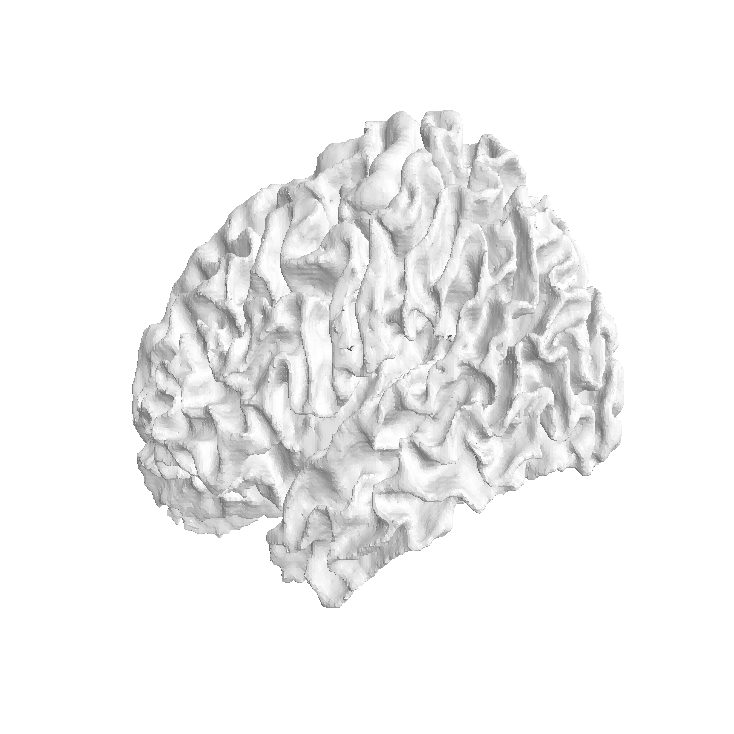

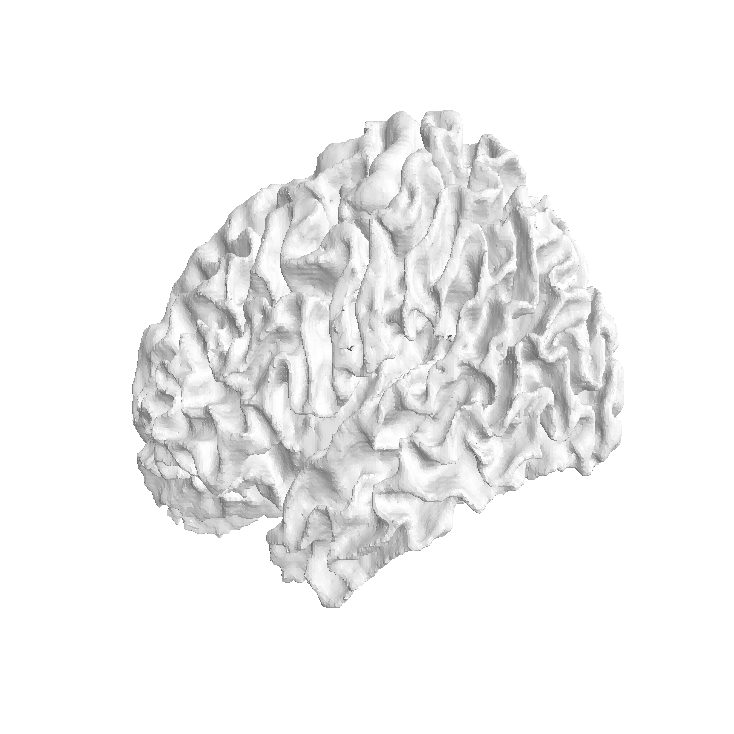

In [136]:
#lh_orig
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='lateral',)

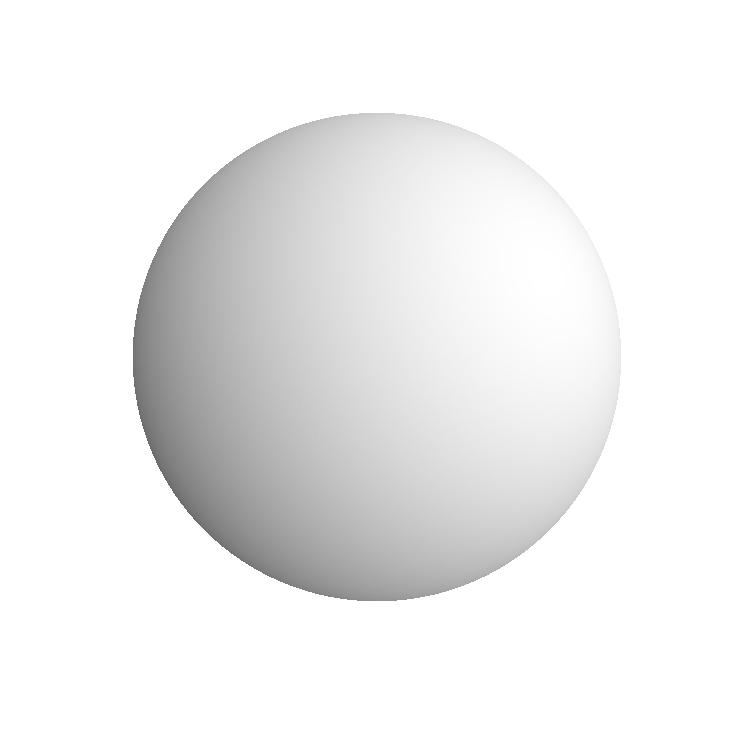

Error in callback <function flush_figures at 0x7f59238797b8> (for post_execute):


KeyboardInterrupt: 

In [141]:
#Freesurfer_IC7
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='lateral', cmap='tab20')

In [142]:
vertices.max(axis=0)
#array([ 3.13392854, 88.33673859, 53.5       ])

array([1., 1., 1.])

In [143]:
vertices.min(axis=0)
#array([-65.2510376, -86.5      , -57.4642868])

array([-1., -1., -1.])

In [144]:
vertices.mean(axis=0)
#array([-28.1001704 ,  -3.89577143,  -0.84442862])

array([-5.49309695e-09, -2.31930762e-08,  4.88275291e-09])

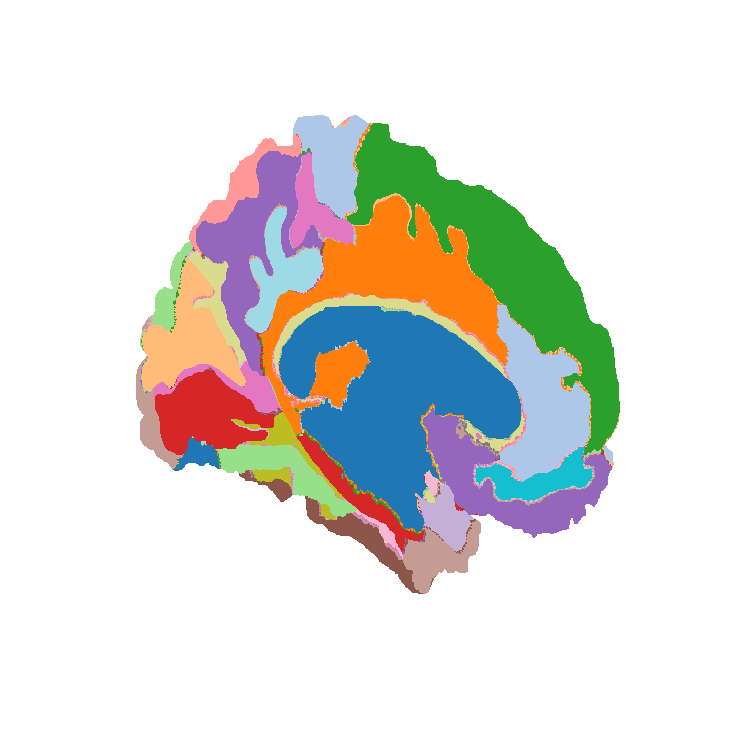

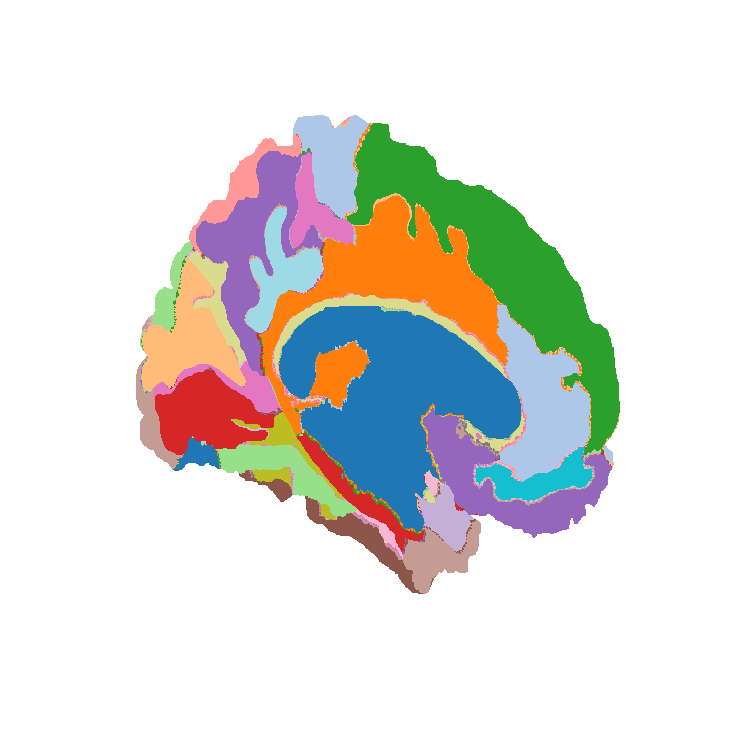

In [58]:
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='medial', surf_map=annot, cmap='tab20')

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
v_sphere, _ = load_surf_mesh('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.sphere')
# v_sphere, _ = load_surf_mesh('/home/kurmukov/lh.reg.sphere')
color = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/857263/label/lh.aparc.a2009s.annot')

dan_sphere, dan_faces = load_mesh_boris('/home/kurmukov/HCP/Dan_rot.m') 
dan_curv, dan_faces = load_mesh_boris('/home/kurmukov/HCP/Dan_iso5.m')
concon_vertices, concon_faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

# v_sphere / 100 -> knn.fit(v_sphere, color) -> color = knn.predict(dan_sphere) -> knn.fit(dan_curv, color)
# -> concon_color = knn.predict(concon_vertices)

In [91]:
v_sphere = v_sphere / 100

In [92]:
knn = KNeighborsClassifier(n_neighbors=1,
                           weights='uniform',
                           metric='minkowski')
knn.fit(v_sphere, color)
dan_color = knn.predict(dan_sphere)
knn.fit(dan_curv, dan_color)
concon_color = knn.predict(concon_vertices)

In [93]:
concon_color.shape

(10242,)

In [94]:
np.unique(concon_color, return_counts=True)

(array([-1,  2,  4, 12, 13, 14, 15, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 46, 48, 49, 50, 51, 53, 54,
        56, 57, 58, 59, 60, 61, 63, 65, 68, 69, 70, 73, 74, 75],
       dtype=int32),
 array([   2,  123,  149,  238,   17,  190,  459,   85,   66,  599,   11,
         188,  545,  582,  155,  153,  145,  100,  397,   67,  232,  281,
         442,   23,  104,  273,   44,  236,   36,  290,  293,   17,  340,
          43,  183,  555,  211,  100,  138,    8,  107,   53,  446,   92,
          51,  219, 1080,   74]))

In [95]:
np.unique(color, return_counts=True)

(array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75], dtype=int32),
 array([7580,  854, 1198, 1747, 1327,  773, 2589, 1666, 1604,  639,  748,
        2018, 2013,  218, 1446, 5313, 7734,  522,  690, 2235, 1309, 1730,
        2614, 1460, 2695, 2731, 3575, 2899, 2853, 3421, 2639, 1144,  629,
         644, 2113,  842,  996, 3411, 3604,  365,  320, 1345, 2030, 1870,
        1843, 3176, 1319,  482, 1613, 1836,  945,  362, 3046, 1878, 3061,
         725, 3533, 1161, 1450,  690, 1244, 2444,  520, 1486, 1410, 2371,
        1170, 3528, 1145, 1871,  651, 1238, 1779, 5482,  410]))

In [99]:
dan_sphere.shape

(20480, 3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,
                           weights='uniform',
                           metric='minkowski')
knn.fit(vertices, annot)

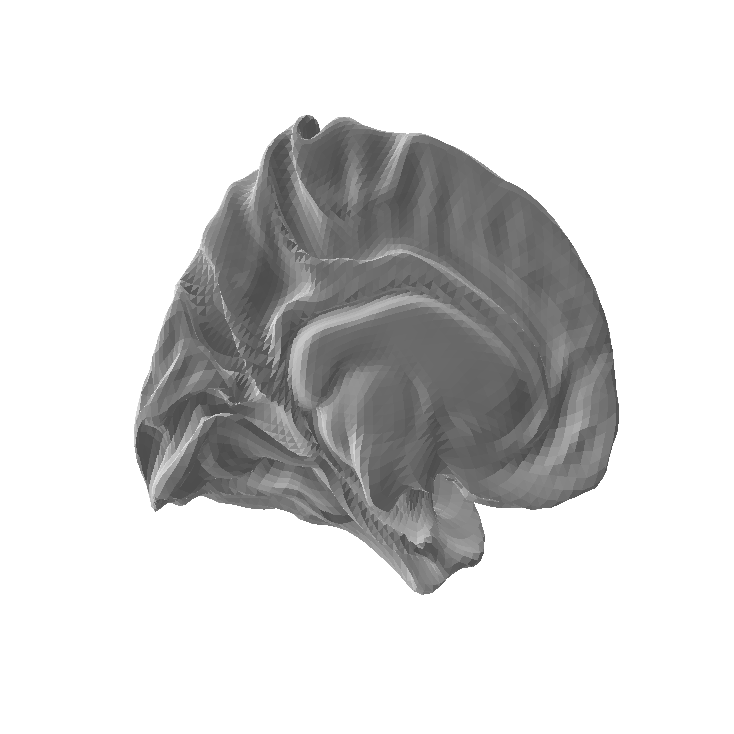

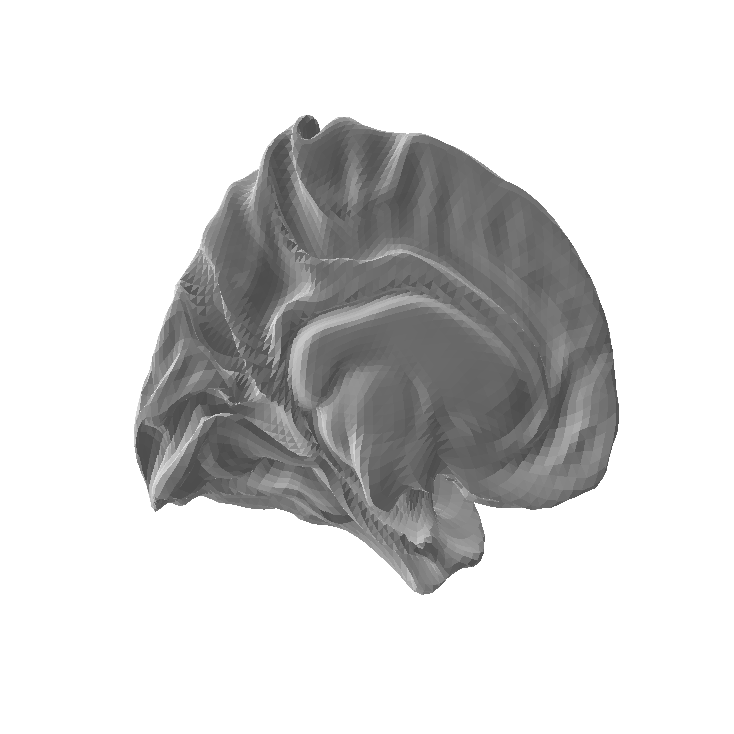

In [121]:
concon_vertices, concon_faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

fig = plt.figure(figsize=(10,10))
plot_surf([concon_vertices, concon_faces], figure=fig, view='medial', cmap='tab20')

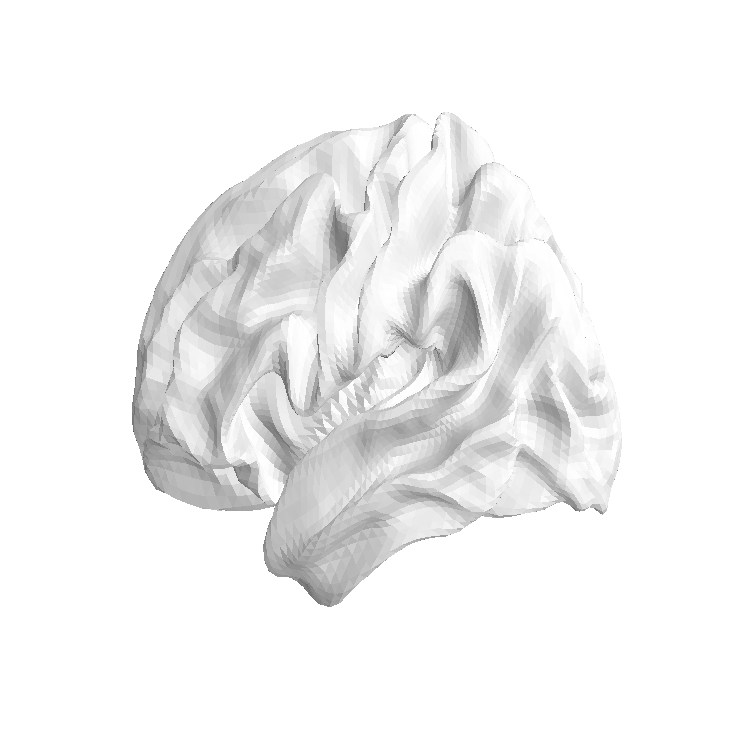

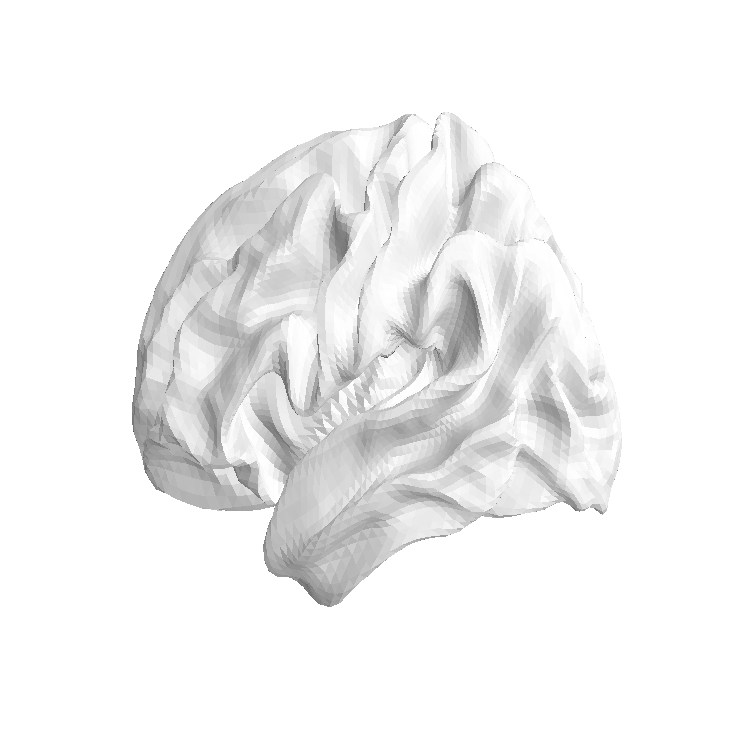

In [137]:
concon_vertices, concon_faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

fig = plt.figure(figsize=(10,10))
plot_surf([concon_vertices, concon_faces], figure=fig, view='lateral', cmap='tab20')

In [157]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/FreeSurfer_IC7.m')
print(vertices.max(axis=0),
vertices.min(axis=0),
vertices.mean(axis=0))

[1. 1. 1.] [-1. -1. -1.] [-5.49309695e-09 -2.31930762e-08  4.88275291e-09]


In [158]:
vertices.shape

(163842, 3)

In [154]:
vertices = vertices/100
print(vertices.max(axis=0),
vertices.min(axis=0),
vertices.mean(axis=0))

[0.99996964 0.99999908 0.99999687] [-0.99997162 -0.99999748 -0.99999947] [-0.01320024  0.01679286 -0.01827921]


In [156]:
vertices.shape

(144022, 3)

In [159]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/Dan_iso5.m')

In [163]:
vertices.shape

(10242, 3)

In [215]:
vertices_fs, faces_fs = read_geometry('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.sphere.reg')
color_fs = load_surf_data('/data01/ayagoz/HCP_1200/FS_reconall/857263/label/lh.aparc.DKTatlas40.annot')

vertices_fs = vertices_fs / 100
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/Dan_iso5.m')

knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           metric='minkowski')
knn.fit(vertices_fs, color_fs)
color_dan_sphere = knn.predict(vertices)

In [216]:
# val, counts = np.unique(color_fs, return_counts=True)
# print(counts/counts.sum())
# print(val)

In [217]:
vertices, faces = load_mesh_boris('/home/kurmukov/HCP/LH_200_mean_ConCon_res.m')

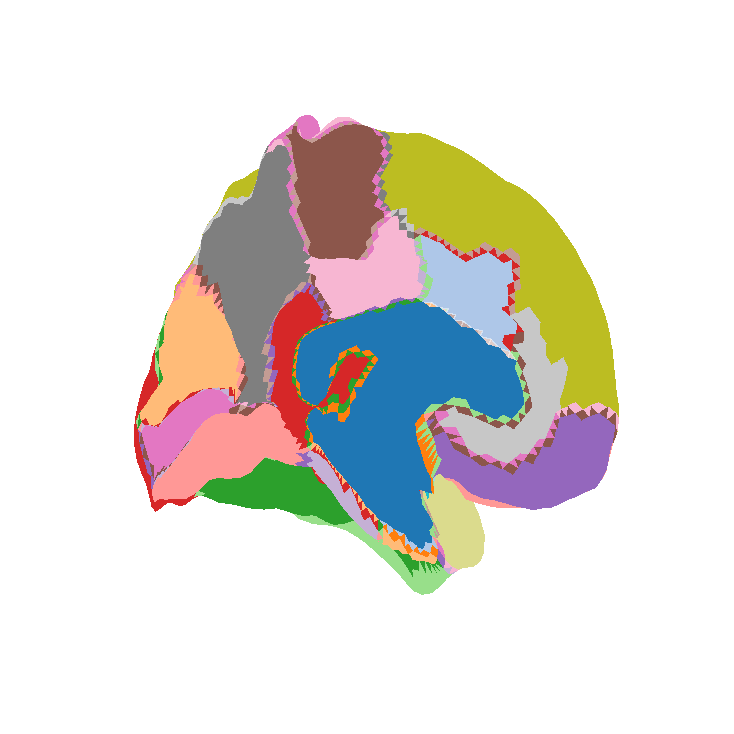

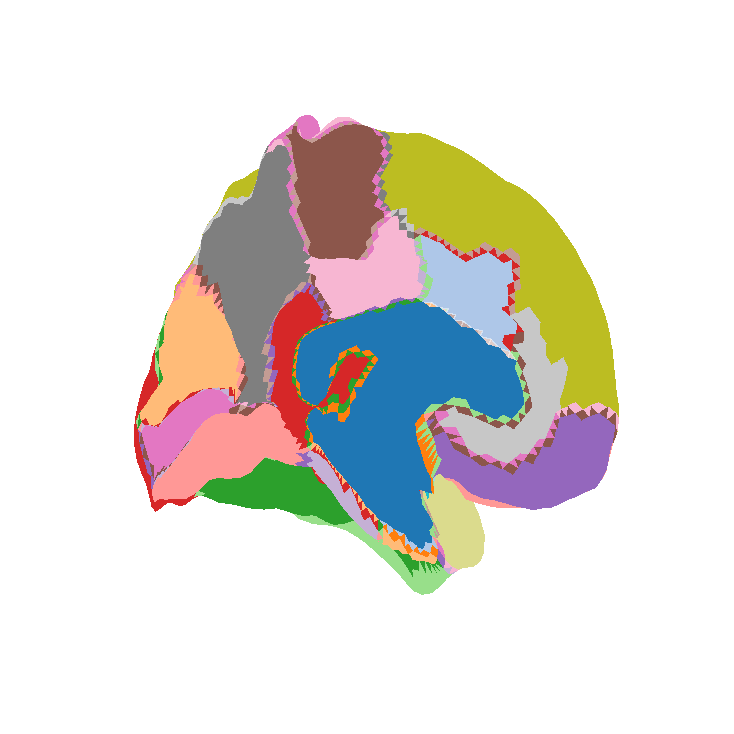

In [218]:
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='medial', surf_map=color_dan_sphere, cmap='tab20')

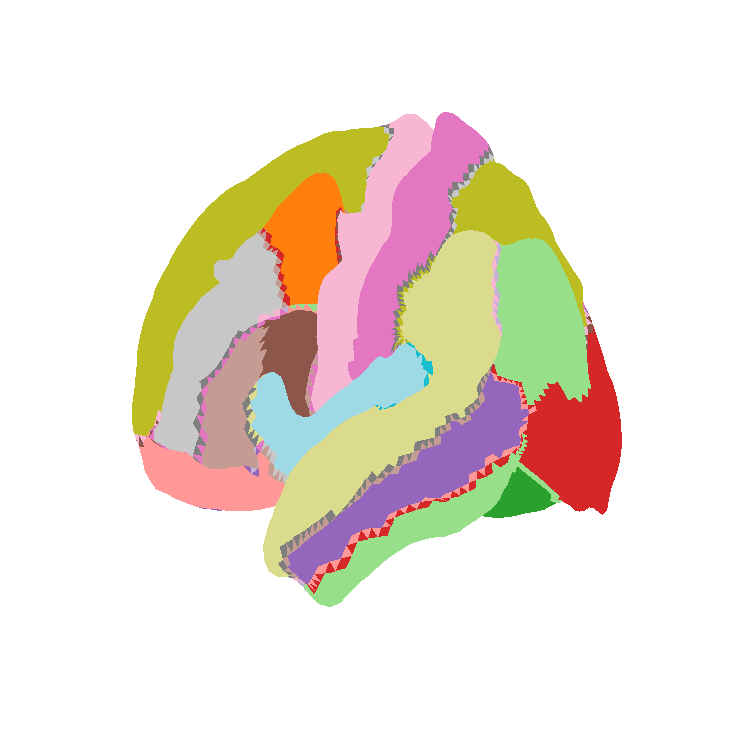

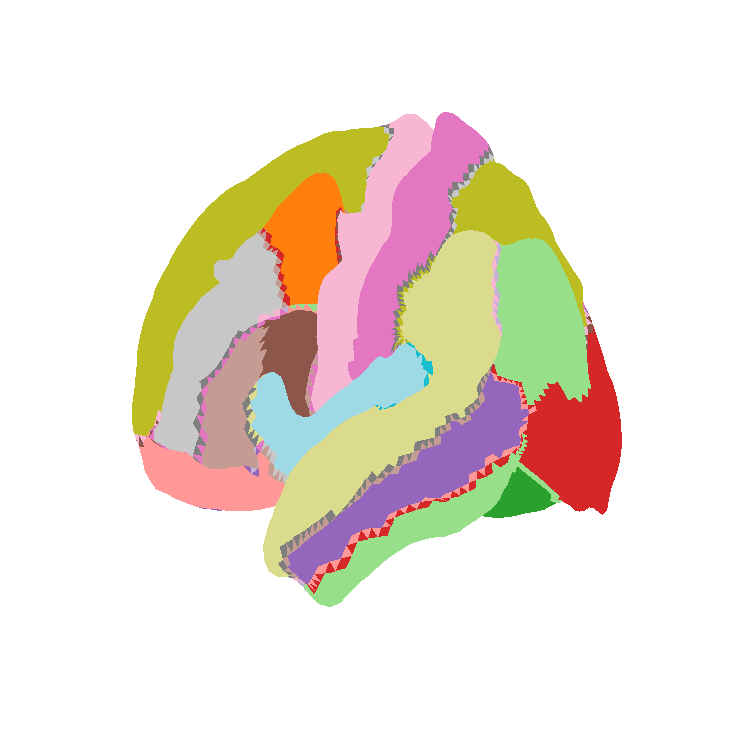

In [213]:
fig = plt.figure(figsize=(10,10))
plot_surf([vertices, faces], figure=fig, view='lateral', surf_map=color_dan_sphere, cmap='tab20')

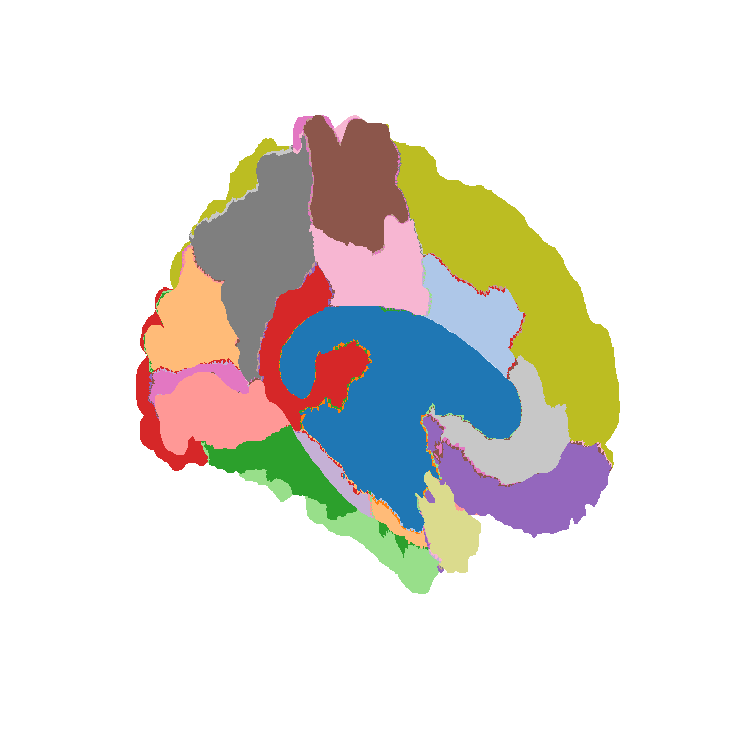

In [199]:
vertices, faces = load_surf_mesh('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.orig')
plot_surf([vertices, faces], figure=fig, view='medial', surf_map=color_fs, cmap='tab20')

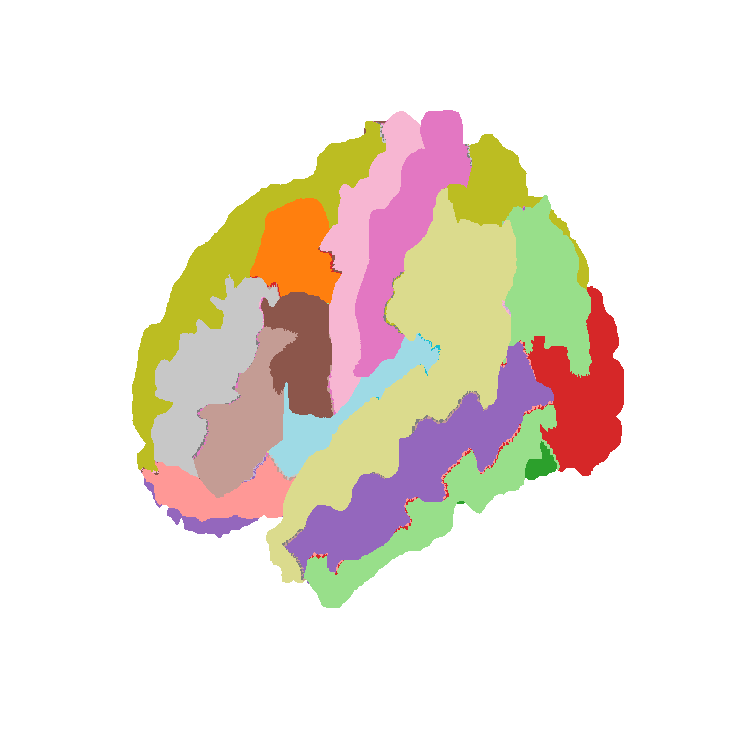

In [214]:
vertices, faces = load_surf_mesh('/data01/ayagoz/HCP_1200/FS_reconall/857263/surf/lh.orig')
plot_surf([vertices, faces], figure=fig, view='lateral', surf_map=color_fs, cmap='tab20')

# Graph connected components

In [3]:
import pandas as pd
import os
from glob import glob

In [15]:
csvs = glob('/home/kurmukov/connective_parcellation/check_network_properties/*.csv')

are_connected = pd.read_csv(csvs[0], index_col=0)
for file in csvs[1:]:
    temp = pd.read_csv(file, index_col=0)
    are_connected = are_connected.append(temp, ignore_index=True)

In [18]:
are_connected['is_connected'].value_counts()

False    15688
True      9352
Name: is_connected, dtype: int64

In [22]:
are_connected.path[10000]

'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/100/224022.npy'

In [31]:
are_connected['resolution'] = are_connected['path'].apply(func = lambda x: x.split('/')[-3])
are_connected['sparsity'] = are_connected['path'].apply(func = lambda x: x.split('/')[-2])
# are_connected['sparsity'] = are_connected['path'].apply(func = lambda x: x.split('/')[-2])


In [34]:
are_connected = are_connected.sort_values(['resolution', 'sparsity'])

In [36]:
are_connected[are_connected.resolution == 'ConCon_resolution']

,path,is_connected,resolution,sparsity
23040,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23041,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23042,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23043,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23044,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23045,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23046,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23047,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23048,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10
23049,/data01/ayagoz/sparse_32_concon_HCP/connectome...,False,ConCon_resolution,10


In [38]:
are_connected.resolution.value_counts()

HE_level3                         4260
HE_level1                         4260
HE_level2                         4260
Desikan_aparc_resolution          4250
Destrieux_aparc2009_resolution    4250
ConCon_resolution                 3760
Name: resolution, dtype: int64

In [40]:
are_connected[are_connected.resolution == 'Desikan_aparc_resolution'].is_connected.value_counts()

True    4250
Name: is_connected, dtype: int64

In [41]:
are_connected[are_connected.resolution == 'Destrieux_aparc2009_resolution'].is_connected.value_counts()

True    4250
Name: is_connected, dtype: int64

In [42]:
are_connected[are_connected.resolution == 'HE_level1'].is_connected.value_counts()

False    4260
Name: is_connected, dtype: int64

In [43]:
are_connected[are_connected.resolution == 'HE_level2'].is_connected.value_counts()

False    4260
Name: is_connected, dtype: int64

In [44]:
are_connected[are_connected.resolution == 'HE_level3'].is_connected.value_counts()

False    3408
True      852
Name: is_connected, dtype: int64

In [45]:
he_3 = are_connected[are_connected.resolution == 'HE_level3']

In [59]:
he_3[he_3['sparsity'] == '100'].is_connected.value_counts()

False    426
Name: is_connected, dtype: int64

In [50]:
he_3.sparsity.value_counts()

80     426
100    426
70     426
30     426
90     426
20     426
60     426
40     426
10     426
50     426
Name: sparsity, dtype: int64

In [65]:
s = 10
path = f'/data01/ayagoz/sparse_32_concon_HCP/parcellations/ensemble_parcellation/connectivity_parcellation_level3/{s}/ensemble_3_{s}.npy'

In [66]:
import numpy as np

In [67]:
colors = np.load(path)

In [68]:
np.unique(colors, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91]),
 array([248, 195, 293, 320, 263, 254, 197, 135, 156, 227, 321, 184,  92,
        212,   2, 240, 293, 230, 210, 341, 123, 218, 216, 243, 191, 269,
        223, 182, 267, 201, 182, 218, 178, 215, 102, 214, 201, 197,  36,
         38, 150, 240, 238, 278, 216, 207, 176, 244, 236,  79, 284, 183,
        291, 232, 120,  99, 209, 298, 221, 279, 315, 221, 138, 129, 217,
          2, 157, 160, 264, 207, 235,  52, 240, 189, 244, 225, 261, 224,
        155, 160, 252, 247, 214,   2, 332, 228, 286, 285, 305, 302, 214]))

In [319]:
os.listdir('/data01/ayagoz/sparse_32_concon_HCP/connectomes/')

['ConCon_resolution',
 'Desikan_aparc_resolution',
 'Destrieux_aparc2009_resolution',
 'Ensemble_parcellation']

In [134]:
connectomes[0].split('/')[-1].split('.')[0]

'200614'

In [179]:
from scipy.spatial.distance import squareform
from tqdm import tqdm
connectomes = sorted(glob('/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level3/100/*.npy'))

subject_id = []
adj = []
edges = []
for c in tqdm(connectomes):
    subject_id.append(int(c.split('/')[-1].split('.')[0]))
    adj.append(np.load(c))
    edges.append(squareform(adj[-1]))

# data = pd.read_csv(glob('/home/kurmukov/connective_parcellation_old/HCP/*.csv')[1])
data = pd.read_csv(glob('/home/kurmukov/connective_parcellation_old/HCP/old_code/*.csv')[0])
sex = dict(zip(data['Subject'], data['Gender']))
target_sex=[sex.get(s) for s in subject_id]

j = None
target_y = []
for i,y in enumerate(target_sex):
    if y is None:
        j = i
    else:
        d = {
            'F':0,
            'M':1
        }
        target_y.append(d[y])
        
edges.pop(j)
target_y = np.array(target_y)
edges = np.array(edges)

100%|██████████| 426/426 [00:00<00:00, 2440.98it/s]


In [193]:
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [194]:
model = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'l1', random_state=5))
score = make_scorer(roc_auc_score, needs_proba=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
params={
    'logisticregression__C': [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 20]
}
gs = GridSearchCV(model, param_grid=params, cv = cv, verbose=10, scoring=score, n_jobs=10)

gs.fit(edges, target_y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done  42 out of  55 | elapsed:    1.4s remaining:    0.4s
[Parallel(n_jobs=10)]: Done  48 out of  55 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  55 out of  55 | elapsed:    1.6s finished
/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                         

0.8480634129423057

In [321]:
def load_sparsity(sparsity=100):
    connectomes = sorted(glob(f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Ensemble_parcellation/HE_level1/{sparsity}/*.npy'))
    connectomes = sorted(glob(f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Desikan_aparc_resolution/{sparsity}/*.npy'))
    
    connectomes = sorted(glob(f'/data01/ayagoz/sparse_32_concon_HCP/connectomes/Destrieux_aparc2009_resolution/{sparsity}/*.npy'))
    subject_id = []
    adj = []
    edges = []
    for c in connectomes:
        subject_id.append(int(c.split('/')[-1].split('.')[0]))
        adj.append(np.load(c))
        edges.append(squareform(adj[-1]))

    # data = pd.read_csv(glob('/home/kurmukov/connective_parcellation_old/HCP/*.csv')[1])
    data = pd.read_csv(glob('/home/kurmukov/connective_parcellation_old/HCP/old_code/*.csv')[0])
    sex = dict(zip(data['Subject'], data['Gender']))
    target_sex=[sex.get(s) for s in subject_id]

    j = None
    target_y = []
    for i,y in enumerate(target_sex):
        if y is None:
            j = i
            edges.pop(j)
        else:
            d = {
                'F':0,
                'M':1
            }
            target_y.append(d[y])

    target_y = np.array(target_y)
    edges = np.array(edges)
    
    return edges, target_y

def eval_model(X, y):
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'l2', random_state=5))
    score = make_scorer(roc_auc_score, needs_proba=True)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
    params={
        'logisticregression__C': [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 20, 30, 50, 100]
        #[200, 300, 400, 500, 600, 1000]
        #[50, 100, 110, 120, 130, 140, 150, 175, 200, 300]
        #[0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 5, 10, 20, 30, 50, 100]
    }#[0.003, 0.01, 0.03,]#
    gs = GridSearchCV(model, param_grid=params, cv = cv, verbose=0, scoring=score, n_jobs=10)

    gs.fit(X, y)

    return gs

In [322]:
score = []
c = []
gss = []
for sparsity in range(10, 101, 10):
    X, y = load_sparsity(sparsity)
    gs = eval_model(X, y)
    score.append(gs.best_score_)
    c.append(gs.best_params_['logisticregression__C'])
    gss.append(gs)

/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kurmukov/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

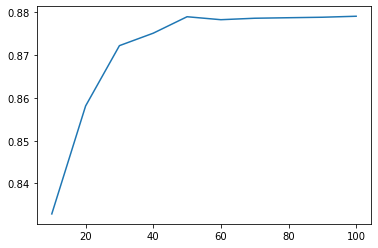

In [323]:
plt.plot(range(10, 101, 10), score)

In [324]:
max(score)

0.8790567909599052

In [325]:
c

[0.0003, 0.0003, 0.001, 0.001, 0.003, 0.003, 0.01, 0.003, 0.003, 0.003]

In [318]:
max(score)

0.8652536275719668

In [303]:
max(score)

0.8607707632621127

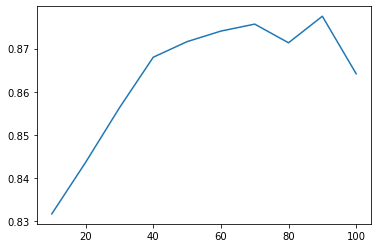

In [231]:
plt.plot(range(10, 101, 10), score)

In [232]:
c

[0.003, 0.003, 0.003, 0.03, 0.01, 0.01, 0.01, 0.01, 0.03, 0.003]

In [290]:
max(score)

0.8256224744114018

In [233]:
max(score)

0.8774708221421024

In [326]:
np.argmax(score)

9

In [235]:
list(range(10, 101, 10))[8]

90

In [327]:
best = gss[9]

In [328]:
mmodel = best.best_estimator_.steps[1][1]

In [329]:
mmodel.coef_[0].shape

(10878,)

In [335]:
148*147/2

10878.0

(array([1.000e+00, 8.000e+00, 3.800e+01, 1.460e+02, 3.132e+03, 1.690e+02,
        5.700e+01, 1.500e+01, 3.000e+00, 1.000e+00]),
 array([-0.58483082, -0.45657968, -0.32832853, -0.20007739, -0.07182624,
         0.0564249 ,  0.18467605,  0.31292719,  0.44117834,  0.56942948,
         0.69768063]),
 <a list of 10 Patch objects>)

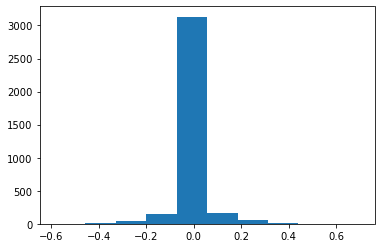

In [275]:
plt.hist(mmodel.coef_[0])

In [280]:
np.nonzero(mmodel.coef_[0])[0]

array([   2,   14,   15,   20,   25,   26,   30,   31,   32,   33,   42,
         44,   45,   47,   48,   51,   56,   59,   63,   66,   68,   70,
         75,   76,   77,   82,   92,   97,  103,  115,  127,  128,  130,
        131,  134,  135,  136,  140,  148,  151,  164,  165,  166,  168,
        169,  171,  172,  175,  182,  186,  193,  196,  202,  206,  212,
        216,  221,  224,  229,  235,  236,  248,  258,  264,  269,  270,
        274,  282,  290,  295,  315,  317,  321,  327,  331,  337,  340,
        342,  357,  367,  374,  383,  397,  400,  404,  408,  409,  413,
        417,  418,  420,  421,  433,  436,  440,  443,  450,  455,  463,
        473,  478,  480,  483,  484,  492,  493,  501,  503,  505,  509,
        514,  519,  525,  527,  529,  533,  534,  536,  542,  548,  549,
        551,  553,  560,  561,  562,  569,  579,  583,  585,  591,  597,
        598,  601,  605,  606,  608,  610,  612,  614,  615,  624,  629,
        634,  638,  642,  645,  651,  652,  656,  6

In [ ]:
|